In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pynoodle import Block, LamellarCell, Mesh, Monomer, Polymer, System
from pynoodle.simulation.scft import SCFT, SCFTOptions

In [2]:
monomer_a = Monomer(0, 1.0)
monomer_b = Monomer(1, 1.0)

block_a = Block(monomer_a, 50, 1.0)
block_b = Block(monomer_b, 50, 1.0)

polymer = Polymer([block_a, block_b], 100, 1.0)

In [3]:
L = 10.0
M = 128

mesh = Mesh(M)
cell = LamellarCell(L)

system = System(mesh, cell, [polymer])
system.set_interaction(0, 1, 0.25)
system.sample_fields()

In [4]:
scft = SCFT(
    system,
    options=SCFTOptions(
        field_step_size=0.1,
        cell_step_size=0.1,
        variable_cell=True,
    ),
)

system.cell

Lamellar([10.0])

In [5]:
result = scft.run()

system.cell

SCFT:  32%|███▏      | 318/1000 [00:00<00:01, 658.46it/s, f=0.034, field_err=1.55e-5, stress_err=0.000996]


Lamellar([17.50263422697372])

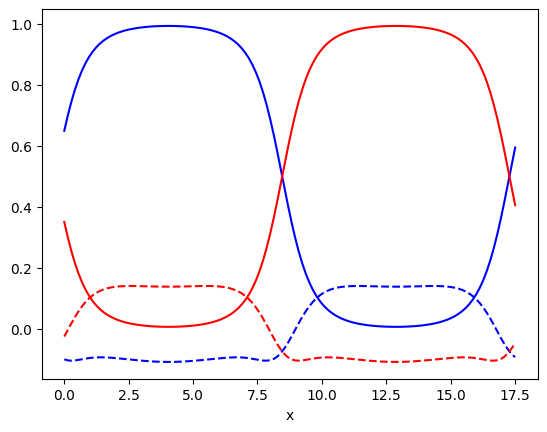

In [6]:
fields = system.get_fields()
concentrations = system.get_concentrations()

x = np.linspace(0, system.cell.parameters[0], M)

plt.plot(x, concentrations[0], c="b")
plt.plot(x, fields[0], c="b", ls="--")

plt.plot(x, concentrations[1], c="r")
plt.plot(x, fields[1], c="r", ls="--")

plt.xlabel("x")
plt.show()